# Creating graphs for your data

Submit by February 18, 11:59 PM PST

## Discussions

There are a variety of conventional ways to visualize data - tables, histograms, bar graphs, etc. Now that your data have been managed, it is time to graph your variables. This portion of the project is vital as it will provide readers with visual representations of your data and help you to better display your findings.
Review criteria

Your assessment will be based on the evidence you provide that you have completed all of the steps. When relevant, gradients in the scoring will be available to reward clarity (for example, you will get one point for submitting graphs that do not accurately represent your data, but two points if the data is accurately represented). In all cases, consider that the peer assessing your work is likely not an expert in the field you are analyzing. You will be assessed equally on your description of your frequency distributions.

### Specific rubric items, and their point values, are as follows:

* Was a univariate graph created for each of the selected variables? (2 points)
* Was a bivariate graph created for the selected variables? (2 points)
* Did the summary describe what the graphs revealed in terms of the individual variables and the relationship between them? (2 points)

## Instructions

Continue with the program you’ve successfully run.

**STEP 1:** Create graphs of your variables one at a time (univariate graphs).

Examine both their center and spread.

**STEP 2:** Create a graph showing the association between your explanatory and response variables (bivariate graph).

Your output should be interpretable (i.e. organized and labeled).

### WHAT TO SUBMIT:

Once you have written a successful program that creates univariate and bivariate graphs, create a blog entry where you post your program and the graphs that you have created. Write a few sentences describing what your graphs reveal in terms of your individual variables and the relationship between them.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
vic = pd.read_csv('2016_census_vic_income_nan.csv')

In [3]:
vic.head()

,postcode,gender,age_low,age_high,income_low,income_high,number
0,POA3000,M,15,19,1.0,149.0,78
1,POA3002,M,15,19,1.0,149.0,6
2,POA3003,M,15,19,1.0,149.0,17
3,POA3004,M,15,19,1.0,149.0,10
4,POA3005,M,15,19,1.0,149.0,0


In [4]:
# gender: P (person)
vic_p = vic[vic['gender'] == 'P']
vic_p['number'].describe()

count    94230.000000
mean        51.286299
std        118.519527
min          0.000000
25%          0.000000
50%          8.000000
75%         47.000000
max       5254.000000
Name: number, dtype: float64

# Distribution of female and male population

I probably need to study seaborn more: https://seaborn.pydata.org/tutorial.html





In [5]:
# Let's recreate the female secondary income variables: income, total_income, age
vic['income'] = (vic['income_low'] + vic['income_high'])/2
vic['total_income'] = vic['income'] * vic['number']
vic['age'] = (vic['age_low'] + vic['age_high'])/2
# make a separate copy so vic stays the same; not necessarily a good idea because it takes more computer memory
vic_f = vic[vic['gender'] == 'F'].copy()
vic_m = vic[vic['gender'] == 'M'].copy()
vic_p = vic[vic['gender'] == 'P'].copy()
# Here I can't use seaborn's countplot because the population numbers have already aggregated (counted).

vic_f_pop= sum(vic_f['number'])
vic_m_pop = sum(vic_m['number'])
# vic_total_population = vic_female_total_population + vic_male_total_population
vic_p = vic[vic['gender'] == 'P']
vic_p_pop = sum(vic_p['number'])

## Looking at the general picture of our data

Assuming you don't have a chance to look at my previous three assignments.

In [6]:
vic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282690 entries, 0 to 282689
Data columns (total 10 columns):
postcode        282690 non-null object
gender          282690 non-null object
age_low         282690 non-null int64
age_high        282690 non-null int64
income_low      244998 non-null float64
income_high     244998 non-null float64
number          282690 non-null int64
income          226152 non-null float64
total_income    226152 non-null float64
age             282690 non-null float64
dtypes: float64(5), int64(3), object(2)
memory usage: 21.6+ MB


In [7]:
vic_f.describe()  # numberic data only

,age_low,age_high,income_low,income_high,number,income,total_income,age
count,94230.000000,94230.000000,81666.000000,81666.000000,94230.000000,75384.000000,7.538400e+04,94230.000000
mean,46.666667,55.111111,1023.153846,1022.153846,26.320758,982.875000,1.946200e+04,50.888889
std,23.570351,25.903567,825.140551,825.140551,62.050075,707.450719,5.211651e+04,24.723914
min,15.000000,19.000000,1.000000,0.000000,0.000000,75.000000,0.000000e+00,17.000000
25%,25.000000,34.000000,400.000000,399.000000,0.000000,424.500000,0.000000e+00,29.500000
50%,45.000000,54.000000,800.000000,799.000000,3.000000,812.000000,2.097000e+03,49.500000
75%,65.000000,74.000000,1500.000000,1499.000000,23.000000,1437.000000,1.376550e+04,69.500000
max,85.000000,99.000000,3000.000000,2999.000000,2985.000000,2499.500000,1.132372e+06,92.000000


In [8]:
vic_f.head()

,postcode,gender,age_low,age_high,income_low,income_high,number,income,total_income,age
73290,POA3000,F,15,19,1.0,149.0,149,75.0,11175.0,17.0
73291,POA3002,F,15,19,1.0,149.0,3,75.0,225.0,17.0
73292,POA3003,F,15,19,1.0,149.0,20,75.0,1500.0,17.0
73293,POA3004,F,15,19,1.0,149.0,20,75.0,1500.0,17.0
73294,POA3005,F,15,19,1.0,149.0,3,75.0,225.0,17.0


# STEP 1: univariate graphs

## Distribution of population in the dataset


## Big picture: Male and Female populations

Because the data has already been aggregated, we cannot use ___countplot___. We have too add the puplation (number) together manually.

Female Population in Victoria is 2480205. 51.3212%
Male Population in Victoria is 2339649. 48.4128%


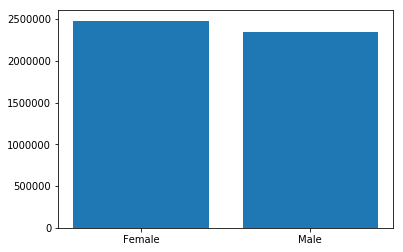

In [9]:
print(f'Female Population in Victoria is {vic_f_pop}. {vic_f_pop/vic_p_pop*100:.4f}%')
print(f'Male Population in Victoria is {vic_m_pop}. {vic_m_pop/vic_p_pop*100:.4f}%')

fig, ax = plt.subplots()
genders = ['Female', 'Male']
pops = [vic_f_pop, vic_m_pop]
plt.bar(genders, pops)
plt.show()

## Univariate graphs of _Male/Female population distriubtion in each postal area_

**univariate distributions**

* Each row of record is a POA (POstal Area)
* We use displot to plot the distribution.
* The graphs show that a very skewed distribution and most populations are very low.


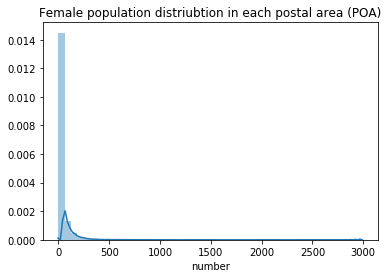

In [10]:
# Here we can see KDE
sns.distplot(vic_f['number'])
plt.title('Female population distriubtion in each postal area (POA)');

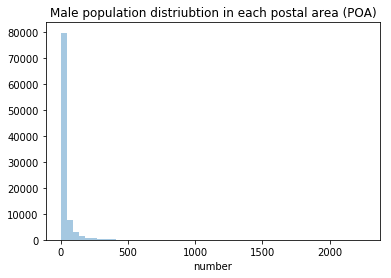

In [11]:
# histogram using distplot with arguments: kde=False, rug=True
sns.distplot(vic_m['number'], kde=False)  # can't really use rug here because the kernel will die on my laptop
plt.title('Male population distriubtion in each postal area (POA)');

# Bivariate Graphs

### More exploration on population distribution

To help use know the population better, we use a bar chart (barplot) to show us the population distribution in different age groups. We also stack male and female bars together to enable us to make an easy comparision.

Here:

* age - categorical
* gender -categorical
* number (population) - quantitative

The bivariate distribution of our target is age and number. Seaborn's barplot however allows use to include gender here for an easier comparision.


## Bivariate Graphs
* x: age
* y: numbers

I also seperate data into male and female bars. 

''

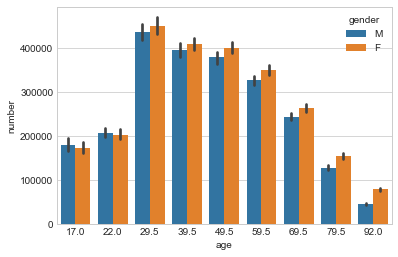

In [12]:
# the age group 92 is for 85 and above (I set the upper bound to 99 so the mean is 92)
sns.set_style("whitegrid")
sns.barplot(x='age', y="number", hue='gender', estimator=sum, data=vic[vic['gender'] != 'P'])
;

# Analysis each weekly income to discover income inequality or not

First, we would like to explore the general trend so we use factorplot to plot "bar charts" of:
* Female and male populatins in each income bracket (factorplot)
 - I can see different distributions in two charts.
 - From the thrid chart (combined genders), the male porportions are higher than female's in the higher income brackets. I divide the numbers by each female/male population to normalize it but it make very little difference as the male and female populations are close enough.
 - The line graph (fourth chart) shows this trend better. The male group overtakes its counterpart from the bracket of `AU$899.5`.
 - We will continue to dig deeper by including age to see if the data can reveal more stories below.

In [16]:
incomes = vic.groupby(['gender', 'age', 'income'])['number'].sum()
incomes = incomes.reset_index()

vic_f_pop = incomes[incomes['gender']=='F']['number'].sum()
vic_m_pop = incomes[incomes['gender']=='M']['number'].sum()
vic_p_pop = vic_f_pop + vic_m_pop
incomes['percent'] = 0
incomes['percent'] = np.where(incomes['gender'] == 'F', incomes['number']/vic_f_pop, incomes['percent'])
incomes['percent'] = np.where(incomes['gender'] == 'M', incomes['number']/vic_m_pop, incomes['percent'])
incomes['percent'] = np.where(incomes['gender'] == 'P', incomes['number']/vic_p_pop, incomes['percent'])

## Bivariate Graph of Income Groups

* Bar graph: Distribution of Income Groups and Female Popuplation (head counts)
* Bar graph: Distribution of Income Groups and Female Popuplation (percentages)
* Bar graph: Distribution of Income Groups and Male Popuplation (percentages)
* Bar graph: Distribution of Income Groups and Male and Famale Popuplation (percentages)
* Line graph: Distribution of Income Groups and Male and Famale Popuplation (percentages)

The last two graphs is easier to compare the difference.

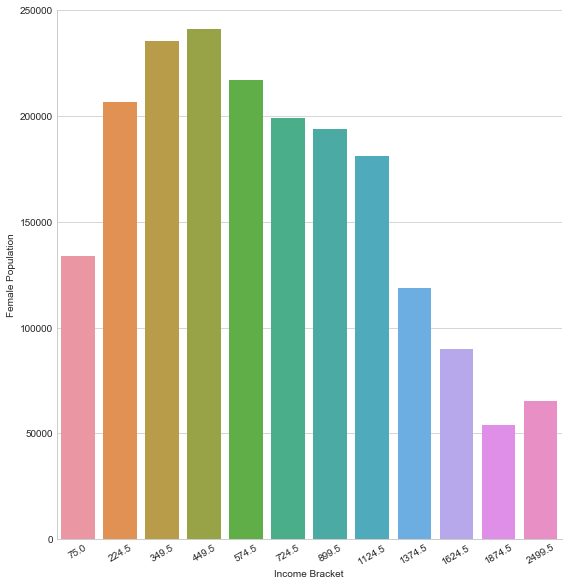

In [19]:
# plt.rcParams["figure.figsize"] = [16,9]
# f, ax = plt.subplots(figsize=(5,6))
from numpy import sum

g = sns.factorplot(x="income", 
                   y="number", 
                   data=incomes[incomes['gender'] == 'F'], 
                   kind="bar",
                   estimator=sum,
                   ci=None,
                   size=8)
g.set_xticklabels(rotation=30)
plt.xlabel('Income Bracket')
plt.ylabel('Female Population')
g.set(ylim=(0, 250000));

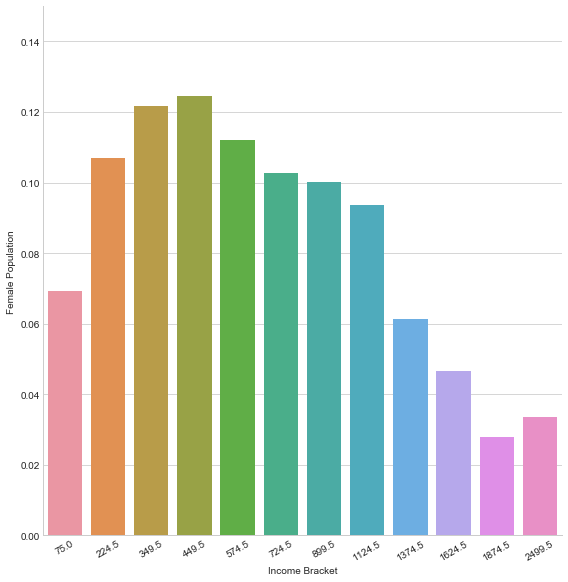

In [20]:
# Normalized by female population
g = sns.factorplot(x="income", 
                   y="percent", 
                   data=incomes[incomes['gender'] == 'F'], 
                   kind="bar",
                   estimator=sum,
                   ci=None,
                   size=8)
g.set_xticklabels(rotation=30)
plt.xlabel('Income Bracket')
plt.ylabel('Female Population')
g.set(ylim=(0, .15));

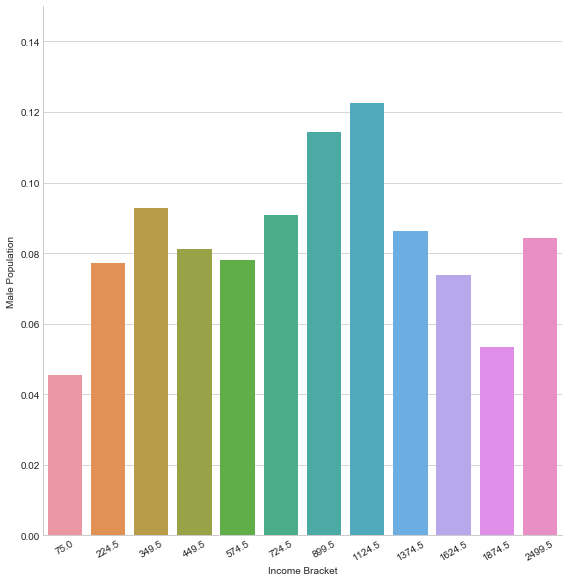

In [21]:
from numpy import sum

g = sns.factorplot(x="income", 
                   y="percent", 
                   data=incomes[incomes['gender'] == 'M'],
                   kind="bar",
                   estimator=sum,
                   ci=None,
                   size=8)
g.set_xticklabels(rotation=30)
plt.xlabel('Income Bracket')
plt.ylabel('Male Population')
g.set(ylim=(0, .15));

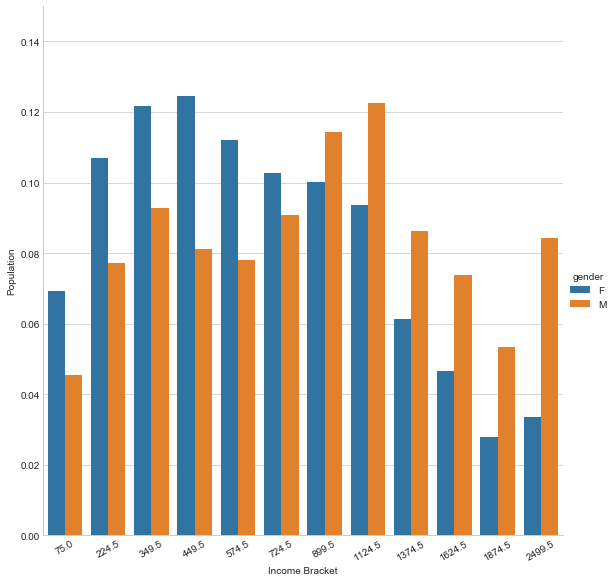

In [23]:
# todo: find better colors later. Like skyblue and pink
g = sns.factorplot(x="income", 
                   y="percent", 
                   data=incomes[incomes['gender'] != 'P'],
                   kind="bar", 
                   estimator=sum,
                   hue='gender',
                   ci=None,
                   size=8)
g.set_xticklabels(rotation=30)
plt.xlabel('Income Bracket')
plt.ylabel('Population')
g.set(ylim=(0, .15));

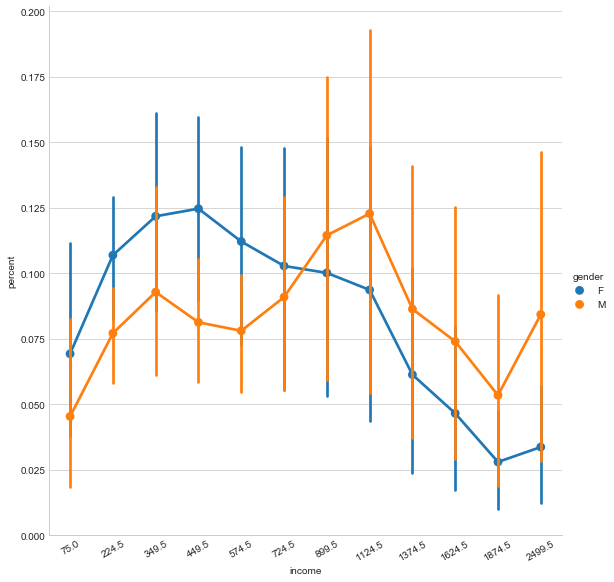

In [25]:
g = sns.factorplot(x='income', 
                   y='percent', 
                   hue='gender',
                   estimator=sum,
                   data=incomes[incomes['gender'] != 'P'],
                   size=8)
g.set_xticklabels(rotation=30)
g.set(ylim=(0, None));

# Other version

I went binge visualization in this assignment and later realised less is more so I cut out half of it. If you are interested in more analysis, you can reference to the long version jupyter notebook: https://github.com/jeremy886/learn_datascience/blob/master/australia/week4_assignment.ipynb



# Conslusion

Before I started the course, I asked the following questions:

* Is Australian weekly income associated with gender?

So far, we can see there is a higher percentage of males in the higer income groups so the answer is likely to be yes. But we will need statistical tools to help us describe the degree of difference and the probability.


